<a href="https://colab.research.google.com/github/RufaidahOmar/Balanced-Dataset-Classification/blob/master/stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd
import io
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from google.colab import files
uploaded = files.upload()


Saving AAXclose.csv to AAXclose.csv


In [0]:
dataset = pd.read_csv(io.BytesIO(uploaded['AAXclose.csv']))
dataset = dataset.drop([])

In [3]:
print("Dataset shape: {}".format(dataset.shape))

# head
print("\n Preview first 5 rows in dataset")
print(dataset.head())

# descriptions
print("\n Dataset Description")
print(dataset.describe())

# class distribution
print("\n Class Distibution")
print(dataset.groupby(' status').size())

Dataset shape: (1198, 3)

 Preview first 5 rows in dataset
    open   close   status
0  0.225   0.225        1
1  0.225   0.225        0
2  0.230   0.225        0
3  0.225   0.230        0
4  0.230   0.230        0

 Dataset Description
              open        close       status
count  1198.000000  1198.000000  1198.000000
mean      0.352990     0.352419     0.114357
std       0.098297     0.098183     0.318378
min       0.155000     0.150000     0.000000
25%       0.266250     0.265000     0.000000
50%       0.375000     0.375000     0.000000
75%       0.405000     0.400000     0.000000
max       0.597100     0.597100     1.000000

 Class Distibution
 status
0    1061
1     137
dtype: int64



 Dataset Visualization


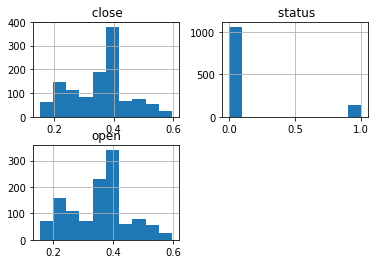

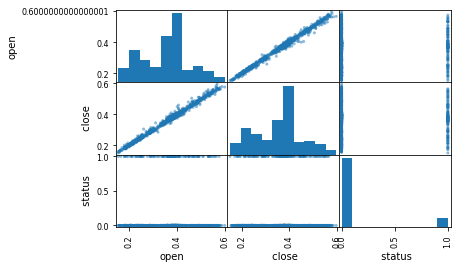

In [4]:
print("\n Dataset Visualization")
# histograms
dataset.hist()
plt.show()

# scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [5]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:2]
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print("\nThere are {} data for training ".format(len(X_train)))
print ("There are {} data for validation".format(len(X_validation)))


There are 958 data for training 
There are 240 data for validation


In [6]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
print("\nAccuracy of model by 10-fold cross validation")
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "{}: {} ({})" .format(name, cv_results.mean(), cv_results.std())
	print(msg)


Accuracy of model by 10-fold cross validation
LR: 0.8882675438596491 (0.02737932229193955)
LDA: 0.8882675438596491 (0.02737932229193955)
KNN: 0.8851425438596492 (0.023017711947296245)
CART: 0.8632236842105264 (0.028679448609507795)
NB: 0.8882675438596491 (0.02737932229193955)
SVM: 0.8882675438596491 (0.02737932229193955)


In [14]:
# Make predictions by KNN
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print('\nKNN')
print("Accuracy score : {}".format(accuracy_score(Y_validation, predictions)))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))  

print("Wrongly classified")
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("{}     : {}         : ({})".format(X_validation[j], Y_validation[j], predictions[j]))


KNN
Accuracy score : 0.8708333333333333
Confusion Matrix 
[[209   1]
 [ 30   0]]
Report
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       210
         1.0       0.00      0.00      0.00        30

   micro avg       0.87      0.87      0.87       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.77      0.87      0.81       240

Wrongly classified
[0.4857 0.4743]     : 1.0         : (0.0)
[0.345 0.34 ]     : 1.0         : (0.0)
[0.35 0.35]     : 1.0         : (0.0)
[0.385 0.375]     : 1.0         : (0.0)
[0.32   0.3114]     : 1.0         : (0.0)
[0.195 0.195]     : 1.0         : (0.0)
[0.21 0.21]     : 1.0         : (0.0)
[0.36  0.355]     : 1.0         : (0.0)
[0.25  0.265]     : 1.0         : (0.0)
[0.365 0.37 ]     : 1.0         : (0.0)
[0.235 0.23 ]     : 1.0         : (0.0)
[0.47 0.46]     : 1.0         : (0.0)
[0.365 0.365]     : 1.0         : (0.0)
[0.365 0.355]     : 1.0         : (0.0)
[0.405 

In [12]:
# Make prediction using LR
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)

print('\nLogistic Regression')
print("Accuracy score : {}".format(accuracy_score(Y_validation, predictions)))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

print("Wrongly classified")  
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("{} : {}  : ({})".format(X_validation[j], Y_validation[j], predictions[j]))


Logistic Regression
Accuracy score : 0.875
Confusion Matrix 
[[210   0]
 [ 30   0]]
Report
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       210
         1.0       0.00      0.00      0.00        30

   micro avg       0.88      0.88      0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.77      0.88      0.82       240

Wrongly classified
[0.4857 0.4743] : 1.0  : (0.0)
[0.345 0.34 ] : 1.0  : (0.0)
[0.35 0.35] : 1.0  : (0.0)
[0.385 0.375] : 1.0  : (0.0)
[0.32   0.3114] : 1.0  : (0.0)
[0.195 0.195] : 1.0  : (0.0)
[0.21 0.21] : 1.0  : (0.0)
[0.36  0.355] : 1.0  : (0.0)
[0.25  0.265] : 1.0  : (0.0)
[0.365 0.37 ] : 1.0  : (0.0)
[0.235 0.23 ] : 1.0  : (0.0)
[0.47 0.46] : 1.0  : (0.0)
[0.365 0.365] : 1.0  : (0.0)
[0.365 0.355] : 1.0  : (0.0)
[0.405 0.46 ] : 1.0  : (0.0)
[0.255 0.26 ] : 1.0  : (0.0)
[0.3714 0.3743] : 1.0  : (0.0)
[0.37 0.37] : 1.0  : (0.0)
[0.4629 0.46  ] : 1.0  : (0.0)
[0.365 0.36

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
# Make predictions by LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)

print('\nLDA')
print("Accuracy score : {}" .format(accuracy_score(Y_validation, predictions)))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

print("Wrongly classified")
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("{} : {}      : ({})".format(X_validation[j], Y_validation[j], predictions[j]))


LDA
Accuracy score : 0.875
Confusion Matrix 
[[210   0]
 [ 30   0]]
Report
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       210
         1.0       0.00      0.00      0.00        30

   micro avg       0.88      0.88      0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.77      0.88      0.82       240

Wrongly classified
[0.4857 0.4743] : 1.0      : (0.0)
[0.345 0.34 ] : 1.0      : (0.0)
[0.35 0.35] : 1.0      : (0.0)
[0.385 0.375] : 1.0      : (0.0)
[0.32   0.3114] : 1.0      : (0.0)
[0.195 0.195] : 1.0      : (0.0)
[0.21 0.21] : 1.0      : (0.0)
[0.36  0.355] : 1.0      : (0.0)
[0.25  0.265] : 1.0      : (0.0)
[0.365 0.37 ] : 1.0      : (0.0)
[0.235 0.23 ] : 1.0      : (0.0)
[0.47 0.46] : 1.0      : (0.0)
[0.365 0.365] : 1.0      : (0.0)
[0.365 0.355] : 1.0      : (0.0)
[0.405 0.46 ] : 1.0      : (0.0)
[0.255 0.26 ] : 1.0      : (0.0)
[0.3714 0.3743] : 1.0      : (0.0)
[0.37 0.37] : 1.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [15]:
# Make predictions by Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
predictions = dt.predict(X_validation)

print('\nDecision Tree')
print("Accuracy score : {}".format(accuracy_score(Y_validation, predictions)))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

print("Wrongly classified")
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("{} : {}      : ({})".format(X_validation[j], Y_validation[j], predictions[j]))


Decision Tree
Accuracy score : 0.8333333333333334
Confusion Matrix 
[[199  11]
 [ 29   1]]
Report
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       210
         1.0       0.08      0.03      0.05        30

   micro avg       0.83      0.83      0.83       240
   macro avg       0.48      0.49      0.48       240
weighted avg       0.77      0.83      0.80       240

Wrongly classified
[0.4857 0.4743] : 1.0      : (0.0)
[0.345 0.34 ] : 1.0      : (0.0)
[0.35 0.35] : 1.0      : (0.0)
[0.385 0.375] : 1.0      : (0.0)
[0.32   0.3114] : 1.0      : (0.0)
[0.195 0.195] : 1.0      : (0.0)
[0.21 0.21] : 1.0      : (0.0)
[0.36  0.355] : 1.0      : (0.0)
[0.5057 0.5086] : 0.0      : (1.0)
[0.25  0.265] : 1.0      : (0.0)
[0.365 0.37 ] : 1.0      : (0.0)
[0.3   0.315] : 0.0      : (1.0)
[0.235 0.23 ] : 1.0      : (0.0)
[0.47 0.46] : 1.0      : (0.0)
[0.365 0.365] : 1.0      : (0.0)
[0.405 0.46 ] : 1.0      : (0.0)
[0.5086 0.5257] : 0.0      

In [17]:
#Make predictions by Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
predictions = nb.predict(X_validation)

print('\nGaussian Naive Bayes')
print("Accuracy score : {}".format(accuracy_score(Y_validation, predictions)))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

print("Wrongly classified")
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("{} : {}      : ({})".format(X_validation[j], Y_validation[j], predictions[j]))

    


Gaussian Naive Bayes
Accuracy score : 0.875
Confusion Matrix 
[[210   0]
 [ 30   0]]
Report
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       210
         1.0       0.00      0.00      0.00        30

   micro avg       0.88      0.88      0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.77      0.88      0.82       240

Wrongly classified
[0.4857 0.4743] : 1.0      : (0.0)
[0.345 0.34 ] : 1.0      : (0.0)
[0.35 0.35] : 1.0      : (0.0)
[0.385 0.375] : 1.0      : (0.0)
[0.32   0.3114] : 1.0      : (0.0)
[0.195 0.195] : 1.0      : (0.0)
[0.21 0.21] : 1.0      : (0.0)
[0.36  0.355] : 1.0      : (0.0)
[0.25  0.265] : 1.0      : (0.0)
[0.365 0.37 ] : 1.0      : (0.0)
[0.235 0.23 ] : 1.0      : (0.0)
[0.47 0.46] : 1.0      : (0.0)
[0.365 0.365] : 1.0      : (0.0)
[0.365 0.355] : 1.0      : (0.0)
[0.405 0.46 ] : 1.0      : (0.0)
[0.255 0.26 ] : 1.0      : (0.0)
[0.3714 0.3743] : 1.0      : (0.0)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
# Make predictions by SVM
svm = SVC(gamma='auto')
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

print('\nSVM')
print("Accuracy score : {}".format(accuracy_score(Y_validation, predictions)))
print("Confusion Matrix ")
print(confusion_matrix(Y_validation, predictions))
print("Report")
print(classification_report(Y_validation, predictions))

print("Wrongly classified")
for j in range(len(X_validation)):
  if Y_validation[j] != predictions[j]:
    print("{} : {}      : ({})".format(X_validation[j], Y_validation[j], predictions[j]))


SVM
Accuracy score : 0.875
Confusion Matrix 
[[210   0]
 [ 30   0]]
Report
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       210
         1.0       0.00      0.00      0.00        30

   micro avg       0.88      0.88      0.88       240
   macro avg       0.44      0.50      0.47       240
weighted avg       0.77      0.88      0.82       240

Wrongly classified
[0.4857 0.4743] : 1.0      : (0.0)
[0.345 0.34 ] : 1.0      : (0.0)
[0.35 0.35] : 1.0      : (0.0)
[0.385 0.375] : 1.0      : (0.0)
[0.32   0.3114] : 1.0      : (0.0)
[0.195 0.195] : 1.0      : (0.0)
[0.21 0.21] : 1.0      : (0.0)
[0.36  0.355] : 1.0      : (0.0)
[0.25  0.265] : 1.0      : (0.0)
[0.365 0.37 ] : 1.0      : (0.0)
[0.235 0.23 ] : 1.0      : (0.0)
[0.47 0.46] : 1.0      : (0.0)
[0.365 0.365] : 1.0      : (0.0)
[0.365 0.355] : 1.0      : (0.0)
[0.405 0.46 ] : 1.0      : (0.0)
[0.255 0.26 ] : 1.0      : (0.0)
[0.3714 0.3743] : 1.0      : (0.0)
[0.37 0.37] : 1.0

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
